# 导入工具包

In [2]:
import networkx as nx
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import matplotlib.colors as mcolors

# 可视化辅助函数

In [4]:
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=25, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw networkx labels(G,pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    # plt.figure(figsize=(10,8))
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()                                      

# 导入全图

In [5]:
G = nx.karate_club_graph()

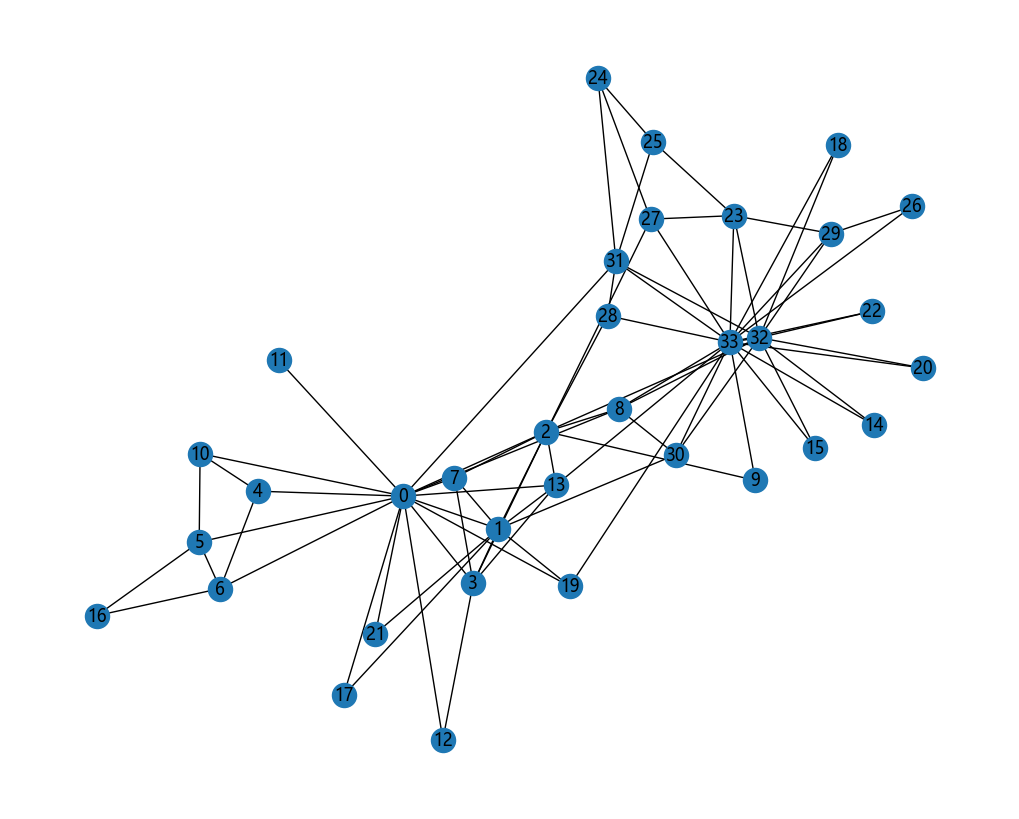

In [6]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=123)
nx.draw(G, pos, with_labels=True)

# 爬虫怕去地铁站

In [7]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.zzmetro.com/lines/query/operating_hours'
html = requests.get(url).text
soup = BeautifulSoup(html)

In [8]:
name_arr = []
for i in soup.select('.lines_div .lines_ul_div')[0].find_all('p'):
    # print(i.text)
    name_arr.append(i.text)

In [9]:
name_arr

['1号线',
 '2号线',
 '3号线',
 '4号线',
 '5号线',
 '6号线',
 '城郊线',
 '14号线',
 '7号线',
 '8号线',
 '10号线',
 '11号线',
 '12号线',
 '13号线']

In [10]:
from string import digits

zong_arr = []
for name, x in zip(name_arr, soup.select('.line_site .table_lx_div')):
    # if name == '7号线':
    #     break
    ditie_name = []
    ditie_time = []
    ll_time = 0
    rr_time = 0

    a1 = 0
    a2 = 0

    for i in x.find_all('tr')[2:]:
        nn = i.find_all('td')

        if nn[2].text.strip() == '——' and nn[4].text.strip() == '——':
            continue


        l_time = nn[2].text.strip().split(':')
        r_time = nn[4].text.strip().split(':')


        if not l_time[0] == '——' and not l_time[0] == '---':
            if l_time[0] == '0':
                l_time[0] = '24'
            a1 = abs(int(l_time[0]) * 60 + int(l_time[1]) - ll_time)
            ll_time = int(l_time[0]) * 60 + int(l_time[1])

        if not r_time[0] == '——' and not r_time[0] == '---':
            if r_time[0] == '0':
                r_time[0] = '24'
            a2 = abs(int(r_time[0]) * 60 + int(r_time[1]) - rr_time)
            rr_time = int(r_time[0]) * 60 + int(r_time[1])

        print(nn[0].text.strip().lstrip('0123456789'), nn[2].text.strip(), nn[4].text.strip(), name, min(a1, a2))
        
        ditie_name.append(nn[0].text.strip().lstrip('0123456789'))
        ditie_time.append(min(a1, a2))
        a1 = a2 = 100
    df = pd.DataFrame()
    df['前一站'] = ditie_name[:-1]
    df['后一站'] = ditie_name[1:]
    df['地铁线'] = name
    df['时间分钟'] = ditie_time[1:]
    zong_arr.append(df)

河南工业大学站 —— 23:00 1号线 0
郑大科技园站 0:14 23:02 1号线 2
郑州大学站 0:12 23:04 1号线 2
梧桐街站 0:09 23:06 1号线 2
兰寨站 0:07 23:08 1号线 2
铁炉站 0:04 23:11 1号线 3
市民中心站 0:01 23:14 1号线 3
西流湖站 23:59 23:16 1号线 2
西三环站 23:56 23:19 1号线 3
秦岭路站 23:54 23:22 1号线 2
五一公园站 23:51 23:24 1号线 2
碧沙岗站 23:49 23:26 1号线 2
绿城广场站 23:47 23:28 1号线 2
医学院站 23:45 23:31 1号线 2
郑州火车站 23:42 23:33 1号线 2
二七广场站 23:40 23:36 1号线 2
人民路站 23:37 23:38 1号线 2
紫荆山站 23:35 23:40 1号线 2
燕庄站 23:32 23:44 1号线 3
民航路站 23:29 23:46 1号线 2
会展中心站 23:27 23:48 1号线 2
黄河南路站 23:23 23:52 1号线 4
农业南路站 23:21 23:54 1号线 2
东风南路站 23:19 23:56 1号线 2
郑州东站 23:17 23:59 1号线 2
市体育中心站 23:11 0:04 1号线 5
龙子湖站 23:08 0:08 1号线 3
文苑北路站 23:05 0:10 1号线 2
河南大学新区站 23:03 —— 1号线 2
贾河站 —— 23:00 2号线 0
惠济区政府站 23:49 23:02 2号线 2
毛庄站 23:46 23:04 2号线 2
黄河迎宾馆站 23:44 23:07 2号线 2
金洼站 23:41 23:09 2号线 2
金达路站 23:39 23:12 2号线 2
刘庄站 23:36 23:15 2号线 3
柳林站 23:33 23:18 2号线 3
沙门站 23:31 23:20 2号线 2
北三环站 23:28 23:23 2号线 3
东风路站 23:26 23:25 2号线 2
关虎屯站 23:24 23:27 2号线 2
黄河路站 23:22 23:30 2号线 2
紫荆山站 23:19 23:32 2号线 2
东大街站 23:16 23

In [11]:
df = pd.concat(zong_arr).reset_index().drop(['index'], axis=1)

In [12]:
df

,前一站,后一站,地铁线,时间分钟
0,河南工业大学站,郑大科技园站,1号线,2.0
1,郑大科技园站,郑州大学站,1号线,2.0
2,郑州大学站,梧桐街站,1号线,2.0
3,梧桐街站,兰寨站,1号线,2.0
4,兰寨站,铁炉站,1号线,3.0
...,...,...,...,...
148,机场东站,港区会展站,城郊线,3.0
149,港区会展站,郑州航空港站,城郊线,3.0
150,铁炉站,市委党校站,14号线,3.0
151,市委党校站,奥体中心站,14号线,2.0


# 创建图

In [13]:
G = nx.Graph()

# 从连接表创建图

In [14]:
for idx, row in df.iterrows():
    G.add_edges_from([(row['前一站'], row['后一站'])], line=row['地铁线'], time=row['时间分钟'])

# 检查是否成功

In [15]:
len(G.nodes)

143

In [16]:
len(G.edges)

153

# 可视化

In [19]:
pos = nx.spring_layout(G, seed=321)

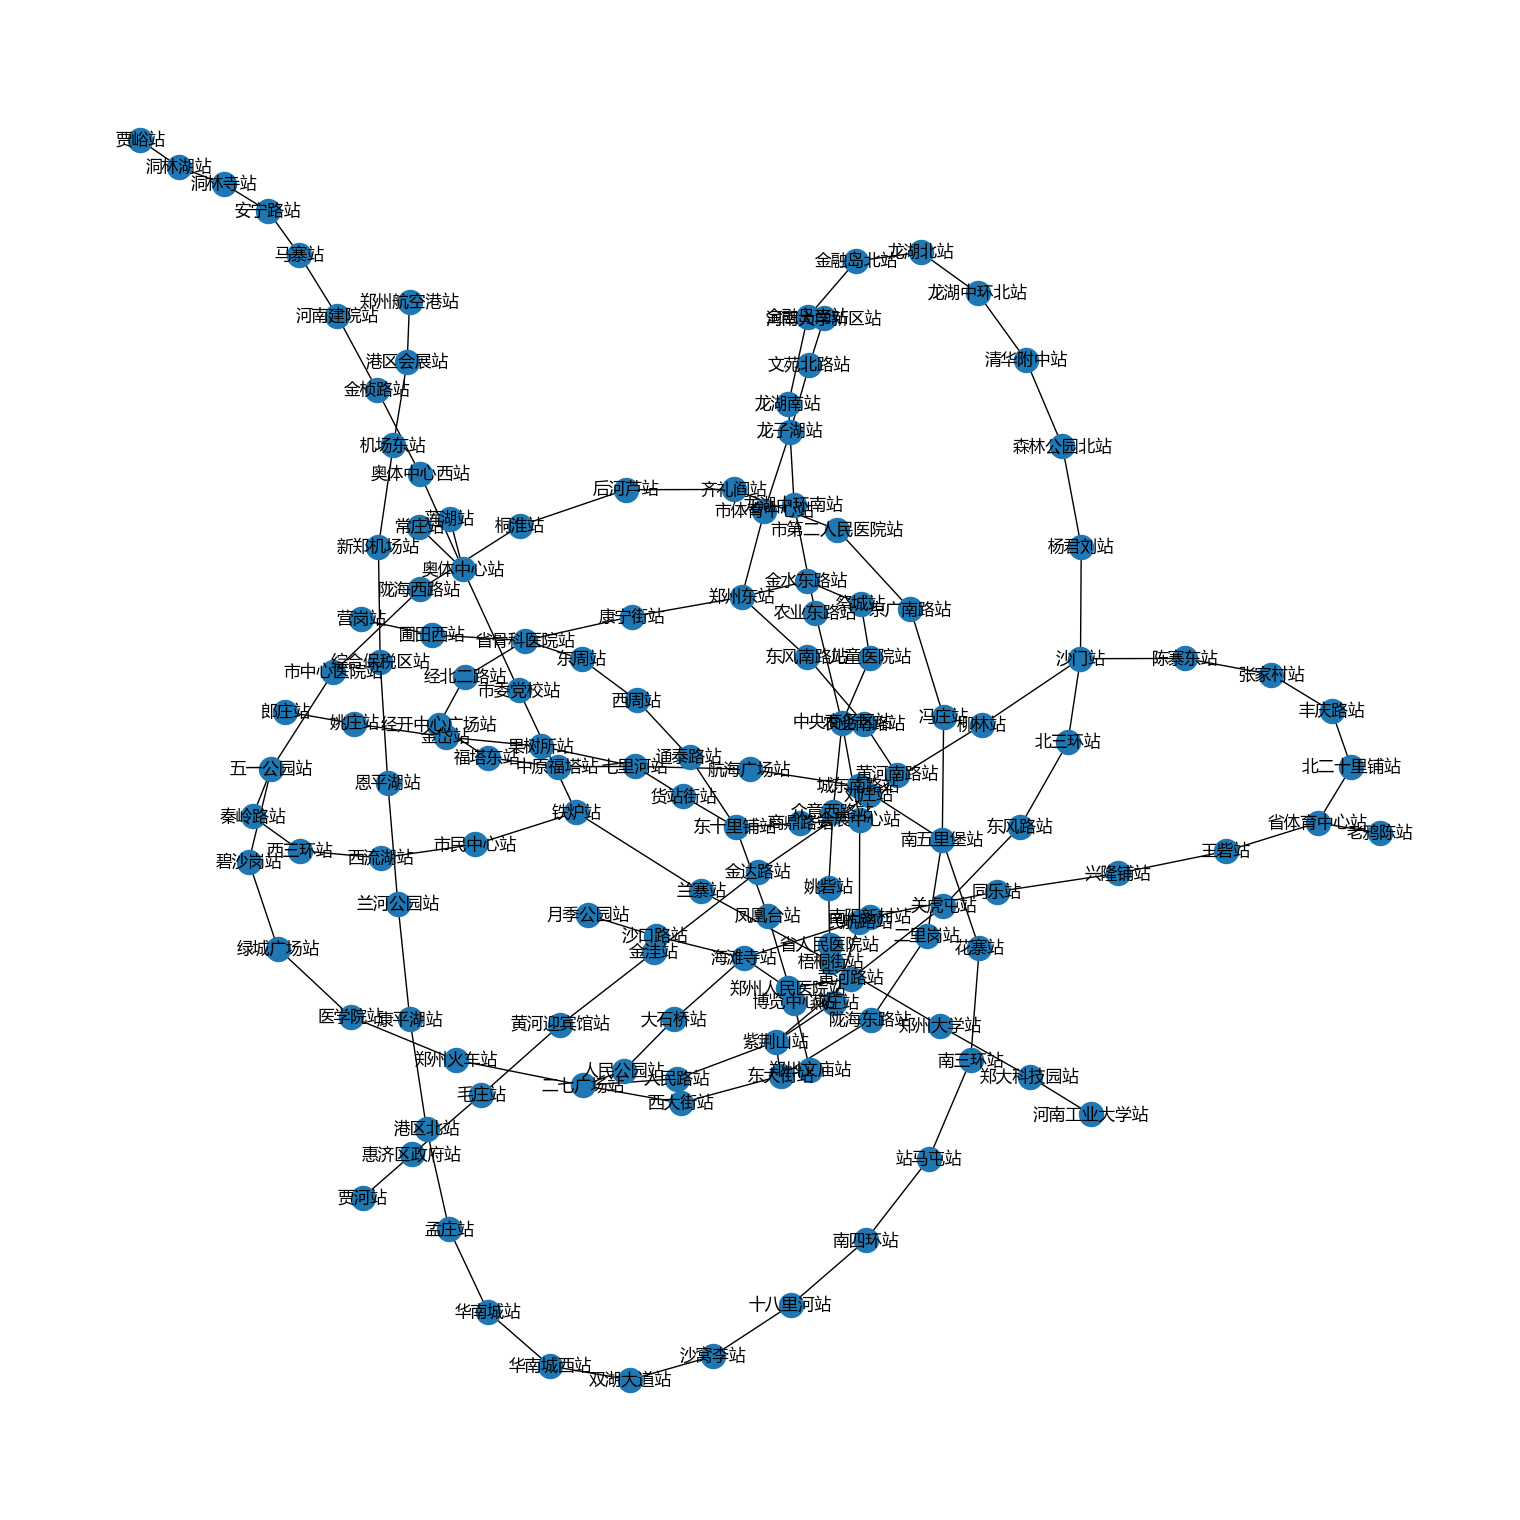

In [20]:
plt.figure(figsize=(15, 15))
nx.draw(G, pos=pos, with_labels=True)

In [216]:
nx.shortest_path(G, source='二里岗站', target='郑州东站', weight='time')

['二里岗站',
 '南五里堡站',
 '城东南路站',
 '航海广场站',
 '七里河站',
 '中原福塔站',
 '福塔东站',
 '经开中心广场站',
 '经北二路站',
 '省骨科医院站',
 '康宁街站',
 '郑州东站']

In [217]:
nx.shortest_path_length(G, source='二里岗站', target='郑州东站', weight='time')

22.0

In [218]:
# 全局平均最短
nx.average_shortest_path_length(G, weight='time')

31.73337929675958

In [219]:
# 某一站去其他站最短
nx.single_source_shortest_path(G, source='二里岗站')

{'二里岗站': ['二里岗站'],
 '陇海东路站': ['二里岗站', '陇海东路站'],
 '南五里堡站': ['二里岗站', '南五里堡站'],
 '东大街站': ['二里岗站', '陇海东路站', '东大街站'],
 '花寨站': ['二里岗站', '南五里堡站', '花寨站'],
 '城东南路站': ['二里岗站', '南五里堡站', '城东南路站'],
 '冯庄站': ['二里岗站', '南五里堡站', '冯庄站'],
 '紫荆山站': ['二里岗站', '陇海东路站', '东大街站', '紫荆山站'],
 '西大街站': ['二里岗站', '陇海东路站', '东大街站', '西大街站'],
 '郑州文庙站': ['二里岗站', '陇海东路站', '东大街站', '郑州文庙站'],
 '南三环站': ['二里岗站', '南五里堡站', '花寨站', '南三环站'],
 '航海广场站': ['二里岗站', '南五里堡站', '城东南路站', '航海广场站'],
 '京广南路站': ['二里岗站', '南五里堡站', '冯庄站', '京广南路站'],
 '人民路站': ['二里岗站', '陇海东路站', '东大街站', '紫荆山站', '人民路站'],
 '燕庄站': ['二里岗站', '陇海东路站', '东大街站', '紫荆山站', '燕庄站'],
 '黄河路站': ['二里岗站', '陇海东路站', '东大街站', '紫荆山站', '黄河路站'],
 '二七广场站': ['二里岗站', '陇海东路站', '东大街站', '西大街站', '二七广场站'],
 '博览中心站': ['二里岗站', '陇海东路站', '东大街站', '郑州文庙站', '博览中心站'],
 '站马屯站': ['二里岗站', '南五里堡站', '花寨站', '南三环站', '站马屯站'],
 '七里河站': ['二里岗站', '南五里堡站', '城东南路站', '航海广场站', '七里河站'],
 '市第二人民医院站': ['二里岗站', '南五里堡站', '冯庄站', '京广南路站', '市第二人民医院站'],
 '民航路站': ['二里岗站', '陇海东路站', '东大街站', '紫荆山站', '燕庄站', '民航路站'],
 '关虎屯站': ['二里岗站', '陇海东路站'

In [220]:
nx.single_source_shortest_path_length(G, source='二里岗站')

{'二里岗站': 0,
 '南五里堡站': 1,
 '陇海东路站': 1,
 '城东南路站': 2,
 '花寨站': 2,
 '冯庄站': 2,
 '东大街站': 2,
 '航海广场站': 3,
 '郑州文庙站': 3,
 '紫荆山站': 3,
 '南三环站': 3,
 '京广南路站': 3,
 '西大街站': 3,
 '黄河路站': 4,
 '站马屯站': 4,
 '二七广场站': 4,
 '燕庄站': 4,
 '市第二人民医院站': 4,
 '人民路站': 4,
 '七里河站': 4,
 '博览中心站': 4,
 '民航路站': 5,
 '人民公园站': 5,
 '南四环站': 5,
 '货站街站': 5,
 '凤凰台站': 5,
 '齐礼阎站': 5,
 '省人民医院站': 5,
 '关虎屯站': 5,
 '郑州人民医院站': 5,
 '中原福塔站': 5,
 '果树所站': 5,
 '郑州火车站': 5,
 '大石桥站': 6,
 '金岱站': 6,
 '姚砦站': 6,
 '会展中心站': 6,
 '海滩寺站': 6,
 '东十里铺站': 6,
 '后河芦站': 6,
 '福塔东站': 6,
 '十八里河站': 6,
 '东风路站': 6,
 '医学院站': 6,
 '众意西路站': 7,
 '沙口路站': 7,
 '沙窝李站': 7,
 '黄河南路站': 7,
 '北三环站': 7,
 '南阳新村站': 7,
 '经开中心广场站': 7,
 '通泰路站': 7,
 '桐淮站': 7,
 '姚庄站': 7,
 '商鼎路站': 7,
 '绿城广场站': 7,
 '中央商务区站': 7,
 '月季公园站': 8,
 '经北二路站': 8,
 '陇海西路站': 8,
 '沙门站': 8,
 '农业东路站': 8,
 '碧沙岗站': 8,
 '同乐站': 8,
 '郎庄站': 8,
 '农业南路站': 8,
 '西周站': 8,
 '儿童医院站': 8,
 '双湖大道站': 8,
 '市中心医院站': 9,
 '东风南路站': 9,
 '华南城西站': 9,
 '省骨科医院站': 9,
 '柳林站': 9,
 '陈寨东站': 9,
 '杨君刘站': 9,
 '东周站': 9,
 '兴隆铺站': 9,
 '五一公园站': 9,
 '祭城站': 9,
 '龙湖中环南站

# 地铁导航系统

In [223]:
A_station = '二里岗站'
B_station = '郑州东站'

shortest_path_list = nx.shortest_path(G, source=A_station, target=B_station, weight='time')

for i in range(len(shortest_path_list)-1):
    previous_station = shortest_path_list[i]
    next_station = shortest_path_list[i+1]
    line_id = G.edges[(previous_station, next_station)]['line']
    time = G.edges[(previous_station, next_station)]['time']
    print(f'{previous_station}---->{next_station}, {line_id}, {time}分钟')

print(f"共计{nx.shortest_path_length(G, source=A_station, target=B_station, weight='time')}分钟")

二里岗站---->南五里堡站, 2号线, 2.0分钟
南五里堡站---->城东南路站, 5号线, 2.0分钟
城东南路站---->航海广场站, 5号线, 2.0分钟
航海广场站---->七里河站, 5号线, 2.0分钟
七里河站---->中原福塔站, 5号线, 2.0分钟
中原福塔站---->福塔东站, 5号线, 2.0分钟
福塔东站---->经开中心广场站, 5号线, 2.0分钟
经开中心广场站---->经北二路站, 5号线, 2.0分钟
经北二路站---->省骨科医院站, 5号线, 2.0分钟
省骨科医院站---->康宁街站, 5号线, 2.0分钟
康宁街站---->郑州东站, 5号线, 2.0分钟
共计22.0分钟


# Node Degree

In [226]:
dict(G.degree())

{'河南工业大学站': 1,
 '郑大科技园站': 2,
 '郑州大学站': 2,
 '梧桐街站': 2,
 '兰寨站': 2,
 '铁炉站': 3,
 '市民中心站': 2,
 '西流湖站': 2,
 '西三环站': 2,
 '秦岭路站': 2,
 '五一公园站': 3,
 '碧沙岗站': 2,
 '绿城广场站': 2,
 '医学院站': 2,
 '郑州火车站': 2,
 '二七广场站': 4,
 '人民路站': 2,
 '紫荆山站': 4,
 '燕庄站': 2,
 '民航路站': 2,
 '会展中心站': 4,
 '黄河南路站': 2,
 '农业南路站': 2,
 '东风南路站': 2,
 '郑州东站': 4,
 '市体育中心站': 2,
 '龙子湖站': 2,
 '文苑北路站': 2,
 '河南大学新区站': 1,
 '贾河站': 1,
 '惠济区政府站': 2,
 '毛庄站': 2,
 '黄河迎宾馆站': 2,
 '金洼站': 2,
 '金达路站': 2,
 '刘庄站': 2,
 '柳林站': 2,
 '沙门站': 4,
 '北三环站': 2,
 '东风路站': 2,
 '关虎屯站': 2,
 '黄河路站': 4,
 '东大街站': 4,
 '陇海东路站': 2,
 '二里岗站': 2,
 '南五里堡站': 4,
 '花寨站': 2,
 '南三环站': 2,
 '站马屯站': 2,
 '南四环站': 2,
 '省体育中心站': 3,
 '王砦站': 2,
 '兴隆铺站': 2,
 '同乐站': 2,
 '南阳新村站': 2,
 '海滩寺站': 4,
 '大石桥站': 2,
 '人民公园站': 2,
 '西大街站': 2,
 '郑州文庙站': 2,
 '博览中心站': 2,
 '凤凰台站': 2,
 '东十里铺站': 4,
 '通泰路站': 2,
 '西周站': 2,
 '东周站': 2,
 '省骨科医院站': 4,
 '圃田西站': 2,
 '营岗站': 1,
 '老鸦陈站': 1,
 '北二十里铺站': 2,
 '丰庆路站': 2,
 '张家村站': 2,
 '陈寨东站': 2,
 '杨君刘站': 2,
 '森林公园北站': 2,
 '清华附中站': 2,
 '龙湖中环北站': 2,
 '龙湖北站': 2,
 '金融岛北站': 2,
 '金融岛南站': 2

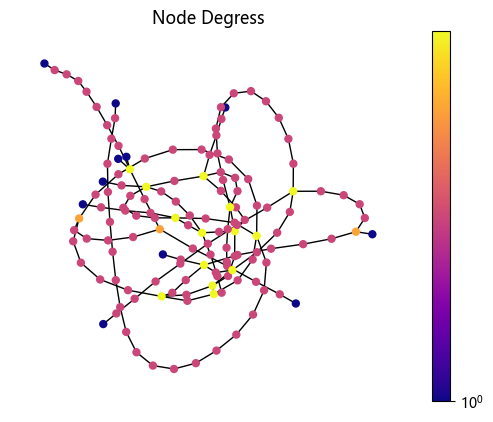

In [234]:
draw(G, pos, dict(G.degree()), 'Node Degress')

# Degree Centrality

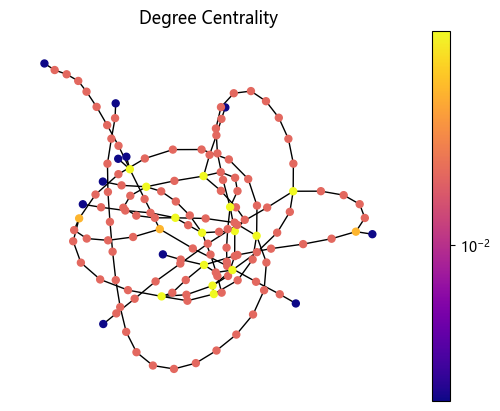

In [235]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

# Eigenvector Centrality

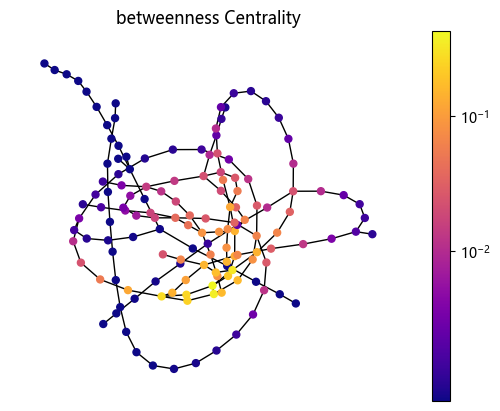

In [251]:
draw(G, pos, nx.eigenvector_centrality(G, max_iter=5000), 'betweenness Centrality')

In [252]:
nx.eigenvector_centrality(G, max_iter=5000)

{'河南工业大学站': 1.6662664728013317e-06,
 '郑大科技园站': 4.535807041877835e-06,
 '郑州大学站': 1.0680772846004781e-05,
 '梧桐街站': 2.453844878688714e-05,
 '兰寨站': 5.611525652839738e-05,
 '铁炉站': 0.00012821190460916436,
 '市民中心站': 0.00023115049110630862,
 '西流湖站': 0.0005009909408220777,
 '西三环站': 0.0011325641575076215,
 '秦岭路站': 0.002581876372037913,
 '五一公园站': 0.005895344744803641,
 '碧沙岗站': 0.010816091638072015,
 '绿城广场站': 0.023546050144159062,
 '医学院站': 0.053276077748142026,
 '郑州火车站': 0.12147074217345429,
 '二七广场站': 0.27736515536688905,
 '人民路站': 0.2571036163622328,
 '紫荆山站': 0.42246344867053087,
 '燕庄站': 0.20226933570410685,
 '民航路站': 0.12810063417298637,
 '会展中心站': 0.14640093024845477,
 '黄河南路站': 0.06525740914653298,
 '农业南路站': 0.03121044164126709,
 '东风南路站': 0.019685938849665793,
 '郑州东站': 0.022364493828107138,
 '市体育中心站': 0.009784081632480826,
 '龙子湖站': 0.004260735980759967,
 '文苑北路站': 0.0018102758590774798,
 '河南大学新区站': 0.0006652777114490847,
 '贾河站': 2.5199778423827445e-05,
 '惠济区政府站': 6.859492054131937e-05,
 '毛庄站': 0.00

# betweenness centrality 

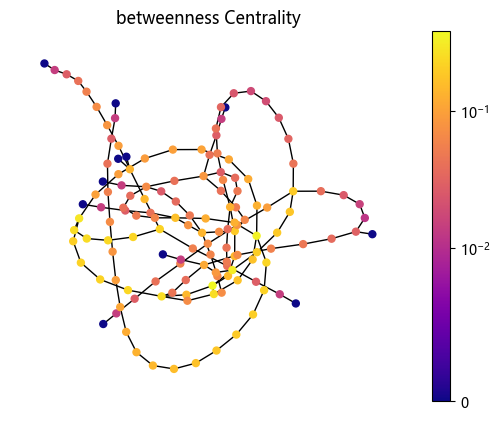

In [245]:
draw(G, pos, nx.betweenness_centrality(G), 'betweenness Centrality')

# 去哪都近

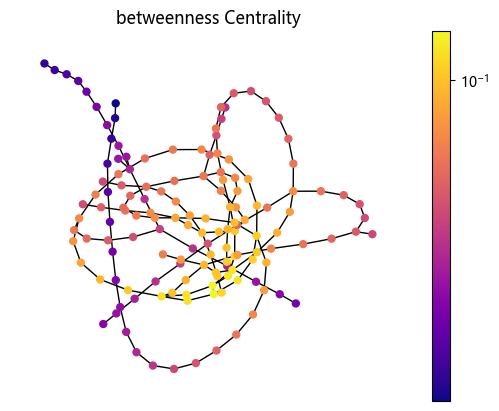

In [253]:
draw(G, pos, nx.closeness_centrality(G), 'betweenness Centrality')

In [254]:
nx.closeness_centrality(G)

{'河南工业大学站': 0.04937413073713491,
 '郑大科技园站': 0.051919561243144424,
 '郑州大学站': 0.054699537750385205,
 '梧桐街站': 0.05774705164701098,
 '兰寨站': 0.06110154905335628,
 '铁炉站': 0.06481058877225011,
 '市民中心站': 0.06813819577735125,
 '西流湖站': 0.0717534108135422,
 '西三环站': 0.07569296375266525,
 '秦岭路站': 0.08,
 '五一公园站': 0.08472553699284009,
 '碧沙岗站': 0.08738461538461538,
 '绿城广场站': 0.09190938511326861,
 '医学院站': 0.09692832764505119,
 '郑州火车站': 0.10252707581227437,
 '二七广场站': 0.10881226053639846,
 '人民路站': 0.10914681014604151,
 '紫荆山站': 0.11572942135289324,
 '燕庄站': 0.11016291698991466,
 '民航路站': 0.10557620817843866,
 '会展中心站': 0.1017921146953405,
 '黄河南路站': 0.09403973509933775,
 '农业南路站': 0.08760024676125848,
 '东风南路站': 0.08217592592592593,
 '郑州东站': 0.07946278679350867,
 '市体育中心站': 0.07388137356919876,
 '龙子湖站': 0.06896551724137931,
 '文苑北路站': 0.0646041856232939,
 '河南大学新区站': 0.06070970500213767,
 '贾河站': 0.051768137076193946,
 '惠济区政府站': 0.054573405073020755,
 '毛庄站': 0.05765326837190418,
 '黄河迎宾馆站': 0.061049011177987965,
 '金

# PageRank

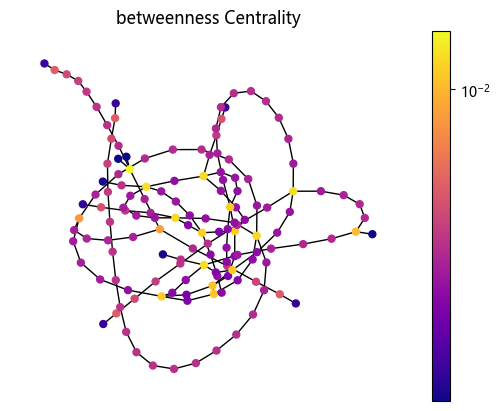

In [21]:
draw(G, pos, nx.pagerank(G), 'betweenness Centrality')

In [256]:
nx.pagerank(G)

{'河南工业大学站': 0.004450981544746645,
 '郑大科技园站': 0.008009785244288636,
 '郑州大学站': 0.0074664620665943135,
 '梧桐街站': 0.007099955812941759,
 '兰寨站': 0.006761818636980342,
 '铁炉站': 0.009526319576818928,
 '市民中心站': 0.00658578128026546,
 '西流湖站': 0.006684062804472672,
 '西三环站': 0.0066673005250653256,
 '秦岭路站': 0.006540428038149791,
 '五一公园站': 0.009375248542099526,
 '碧沙岗站': 0.006482110529963475,
 '绿城广场站': 0.006531792125258904,
 '医学院站': 0.0064201891185189635,
 '郑州火车站': 0.006105387430149321,
 '二七广场站': 0.010956037743443421,
 '人民路站': 0.00559410994441806,
 '紫荆山站': 0.010432842775794902,
 '燕庄站': 0.005726808173800955,
 '民航路站': 0.0057896973742743284,
 '会展中心站': 0.010857319509853997,
 '黄河南路站': 0.006001551498353968,
 '农业南路站': 0.00622561628382849,
 '东风南路站': 0.006177525757328858,
 '郑州东站': 0.011686212308091791,
 '市体育中心站': 0.006574182686941006,
 '龙子湖站': 0.007159060101293038,
 '文苑北路站': 0.00780083134961847,
 '河南大学新区站': 0.004364671638717222,
 '贾河站': 0.0044819248352369915,
 '惠济区政府站': 0.00807883171864512,
 '毛庄站': 0.0075745034

# Katz Centrality

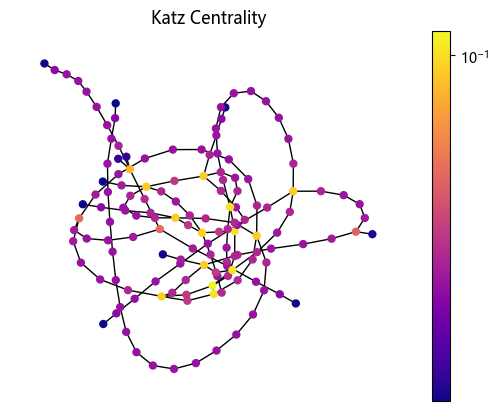

In [22]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

# HITS HUbs and Authorities

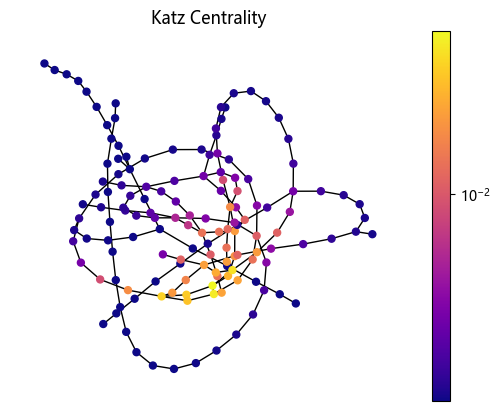

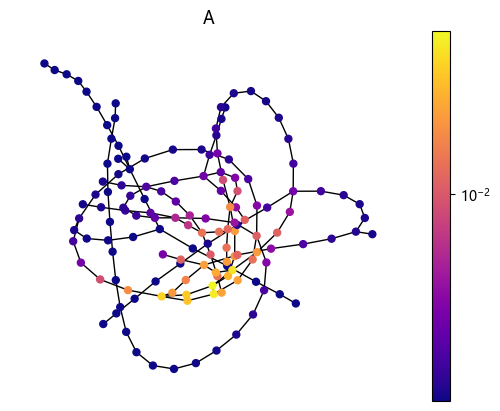

In [25]:
h, a = nx.hits(G)
draw(G, pos, h, 'Katz Centrality')
draw(G, pos, a, 'A')

# 社群属性
## 三角形个数

In [26]:
nx.triangles(G)

{'河南工业大学站': 0,
 '郑大科技园站': 0,
 '郑州大学站': 0,
 '梧桐街站': 0,
 '兰寨站': 0,
 '铁炉站': 0,
 '市民中心站': 0,
 '西流湖站': 0,
 '西三环站': 0,
 '秦岭路站': 0,
 '五一公园站': 0,
 '碧沙岗站': 0,
 '绿城广场站': 0,
 '医学院站': 0,
 '郑州火车站': 0,
 '二七广场站': 0,
 '人民路站': 0,
 '紫荆山站': 0,
 '燕庄站': 0,
 '民航路站': 0,
 '会展中心站': 0,
 '黄河南路站': 0,
 '农业南路站': 0,
 '东风南路站': 0,
 '郑州东站': 0,
 '市体育中心站': 0,
 '龙子湖站': 0,
 '文苑北路站': 0,
 '河南大学新区站': 0,
 '贾河站': 0,
 '惠济区政府站': 0,
 '毛庄站': 0,
 '黄河迎宾馆站': 0,
 '金洼站': 0,
 '金达路站': 0,
 '刘庄站': 0,
 '柳林站': 0,
 '沙门站': 0,
 '北三环站': 0,
 '东风路站': 0,
 '关虎屯站': 0,
 '黄河路站': 0,
 '东大街站': 0,
 '陇海东路站': 0,
 '二里岗站': 0,
 '南五里堡站': 0,
 '花寨站': 0,
 '南三环站': 0,
 '站马屯站': 0,
 '南四环站': 0,
 '省体育中心站': 0,
 '王砦站': 0,
 '兴隆铺站': 0,
 '同乐站': 0,
 '南阳新村站': 0,
 '海滩寺站': 0,
 '大石桥站': 0,
 '人民公园站': 0,
 '西大街站': 0,
 '郑州文庙站': 0,
 '博览中心站': 0,
 '凤凰台站': 0,
 '东十里铺站': 0,
 '通泰路站': 0,
 '西周站': 0,
 '东周站': 0,
 '省骨科医院站': 0,
 '圃田西站': 0,
 '营岗站': 0,
 '老鸦陈站': 0,
 '北二十里铺站': 0,
 '丰庆路站': 0,
 '张家村站': 0,
 '陈寨东站': 0,
 '杨君刘站': 0,
 '森林公园北站': 0,
 '清华附中站': 0,
 '龙湖中环北站': 0,
 '龙湖北站': 0,
 '金融岛北站': 0,
 '金融岛南站': 0

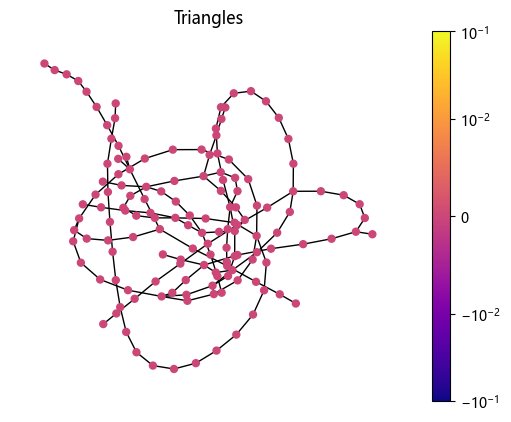

In [27]:
draw(G, pos, nx.triangles(G), 'Triangles')

# Clustering Coefficient

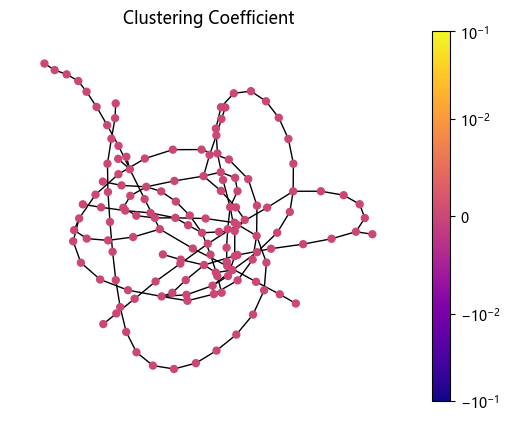

In [28]:
draw(G, pos, nx.clustering(G), 'Clustering Coefficient')